In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
train = pd.read_csv('train_technidus_clf.csv')
test = pd.read_csv('test_technidus_clf.csv')

# Data Preprocessing

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,7685.0,18763.213403,4832.429369,11001.0,14676.0,18493.0,22393.0,29482.0
HomeOwnerFlag,7685.0,0.696682,0.459721,0.0,0.0,1.0,1.0,1.0
NumberCarsOwned,7685.0,1.569031,1.177871,0.0,1.0,2.0,2.0,4.0
NumberChildrenAtHome,7685.0,1.230839,1.650189,0.0,0.0,0.0,2.0,5.0
TotalChildren,7685.0,2.151464,1.727375,0.0,1.0,2.0,4.0,5.0
YearlyIncome,7685.0,82323.659206,40368.317414,10063.0,50784.0,82158.0,109389.0,193721.0
AveMonthSpend,7685.0,76.383995,29.367313,26.0,53.0,71.0,89.0,176.0
BikeBuyer,7685.0,0.496291,0.500019,0.0,0.0,0.0,1.0,1.0


In [4]:
train.drop('CustomerID',axis=1).duplicated().sum()

0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7685 entries, 0 to 7684
Data columns (total 25 columns):
CustomerID              7685 non-null int64
Title                   41 non-null object
FirstName               7685 non-null object
MiddleName              4457 non-null object
LastName                7685 non-null object
Suffix                  1 non-null object
AddressLine1            7685 non-null object
AddressLine2            135 non-null object
City                    7685 non-null object
StateProvinceName       7685 non-null object
CountryRegionName       7685 non-null object
PostalCode              7685 non-null object
PhoneNumber             7685 non-null object
BirthDate               7685 non-null object
Education               7685 non-null object
Occupation              7685 non-null object
Gender                  7685 non-null object
MaritalStatus           7685 non-null object
HomeOwnerFlag           7685 non-null int64
NumberCarsOwned         7685 non-null int64
Nu

In [6]:
#Print out all the columns that has less than 30% null values
nn_cols=[col for col in train.columns if train[col].count()<=0.7*len(train)]
print(nn_cols)

['Title', 'MiddleName', 'Suffix', 'AddressLine2']


In [7]:
train.drop(nn_cols,axis=1,inplace=True)
test.drop(nn_cols,axis=1,inplace=True)

In [8]:
train.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
dtype: int64

In [9]:
train.nunique()

CustomerID              7685
FirstName                606
LastName                 296
AddressLine1            6581
City                     250
StateProvinceName         45
CountryRegionName          6
PostalCode               301
PhoneNumber             3882
BirthDate               5173
Education                  5
Occupation                 5
Gender                     2
MaritalStatus              2
HomeOwnerFlag              2
NumberCarsOwned            5
NumberChildrenAtHome       6
TotalChildren              6
YearlyIncome            7489
AveMonthSpend            148
BikeBuyer                  2
dtype: int64

In [10]:
uninformative=['FirstName','LastName','CustomerID','PhoneNumber','AddressLine1','PostalCode']

In [11]:
train.drop(uninformative,axis=1,inplace=True)
test.drop(uninformative,axis=1,inplace=True)

In [12]:
#Convert BirthDate to Year,Month
train['BirthYear']=pd.to_datetime(train['BirthDate']).dt.year;
train.drop(['BirthDate'],axis=1,inplace=True)

test['BirthYear']=pd.to_datetime(test['BirthDate']).dt.year;
test.drop(['BirthDate'],axis=1,inplace=True)

In [13]:
train.nunique()

City                     250
StateProvinceName         45
CountryRegionName          6
Education                  5
Occupation                 5
Gender                     2
MaritalStatus              2
HomeOwnerFlag              2
NumberCarsOwned            5
NumberChildrenAtHome       6
TotalChildren              6
YearlyIncome            7489
AveMonthSpend            148
BikeBuyer                  2
BirthYear                 64
dtype: int64

In [14]:
cat_col=[col for col in train.columns if train[col].nunique()<10] + ['StateProvinceName','City']
num_col=list(set(list(train.columns))-set(cat_col))

In [15]:
print('Categorical features are:',cat_col)
print('')
print('Numerical features are:',num_col)

Categorical features are: ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer', 'StateProvinceName', 'City']

Numerical features are: ['BirthYear', 'AveMonthSpend', 'YearlyIncome']


# EDA

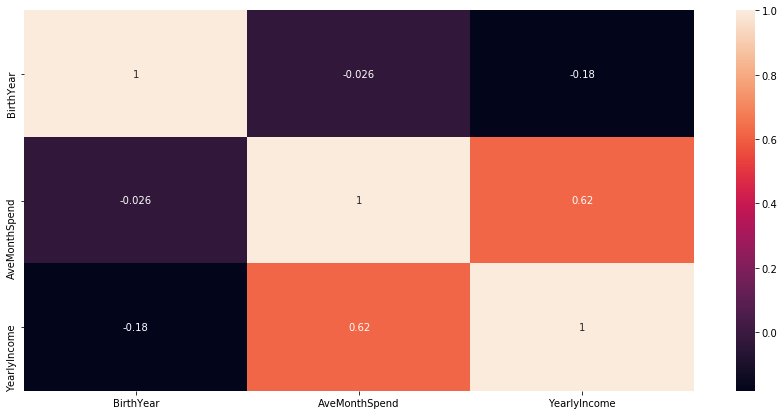

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(train[num_col].corr(),annot=True)

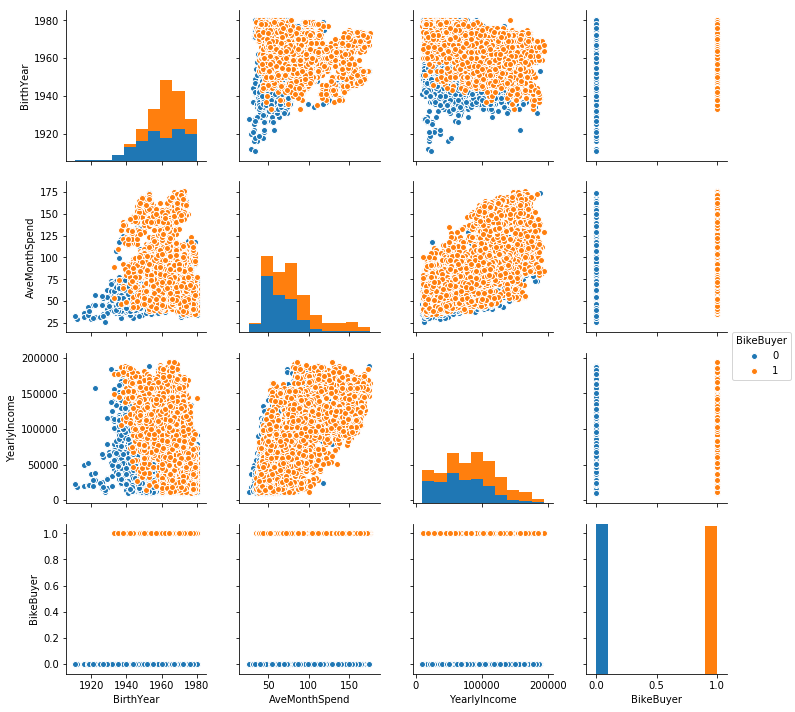

In [17]:
sc=num_col + ['BikeBuyer']
sns.pairplot(train[sc],hue='BikeBuyer')

In [18]:
for col in cat_col:
    print(train[col].value_counts())
    print('')

United States     3226
Australia         1537
United Kingdom     820
France             731
Germany            726
Canada             645
Name: CountryRegionName, dtype: int64

Bachelors              2294
Partial College        2117
High School            1361
Graduate Degree        1324
Partial High School     589
Name: Education, dtype: int64

Professional      2485
Skilled Manual    1845
Management        1330
Clerical          1095
Manual             930
Name: Occupation, dtype: int64

M    4024
F    3661
Name: Gender, dtype: int64

M    3939
S    3746
Name: MaritalStatus, dtype: int64

1    5354
0    2331
Name: HomeOwnerFlag, dtype: int64

2    2521
1    2030
0    1681
3     826
4     627
Name: NumberCarsOwned, dtype: int64

0    4171
1     962
2     825
3     611
4     566
5     550
Name: NumberChildrenAtHome, dtype: int64

0    1851
2    1368
1    1353
4    1190
3     965
5     958
Name: TotalChildren, dtype: int64

0    3871
1    3814
Name: BikeBuyer, dtype: int64

California  

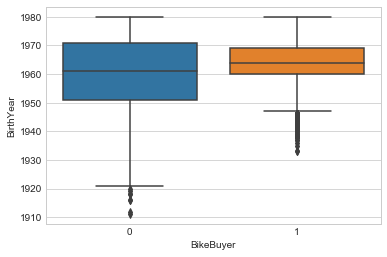

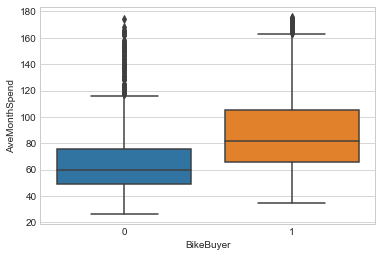

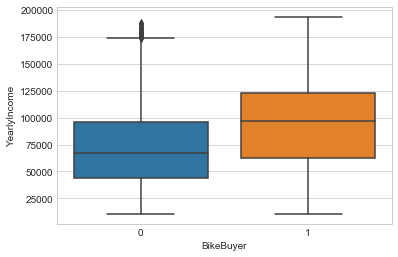

In [19]:
for col in num_col:
    sns.set_style("whitegrid")
    sns.boxplot('BikeBuyer', col, data=train)
    plt.xlabel('BikeBuyer')
    plt.ylabel(col)
    plt.show()

CountryRegionName


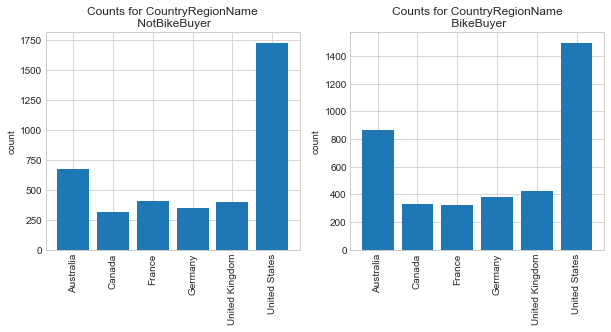

Education


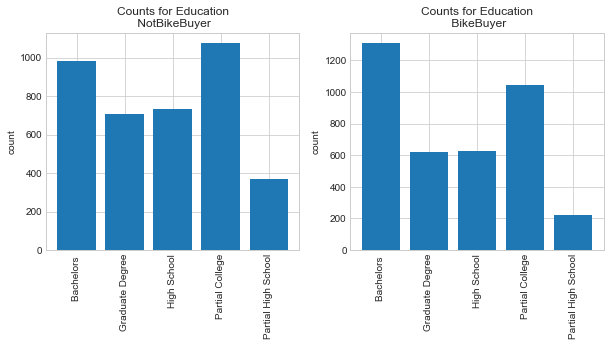

Occupation


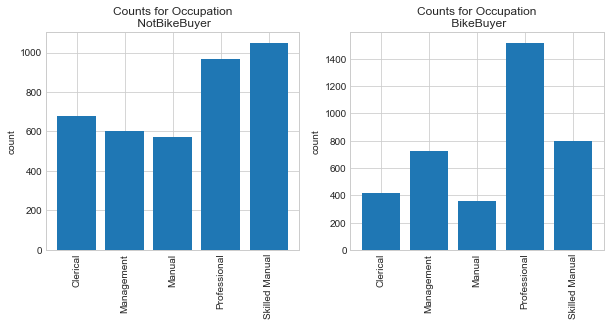

Gender


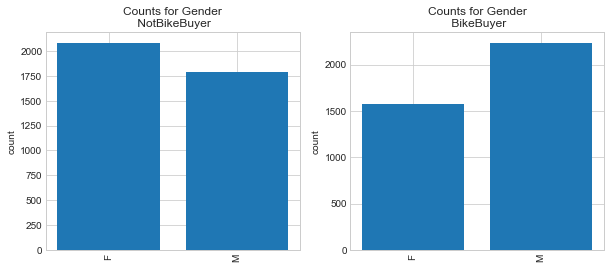

MaritalStatus


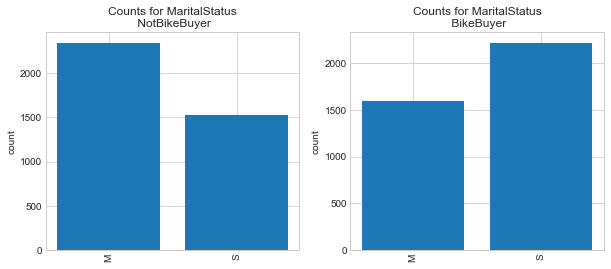

HomeOwnerFlag


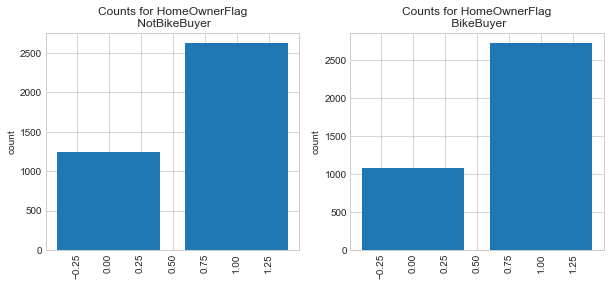

NumberCarsOwned


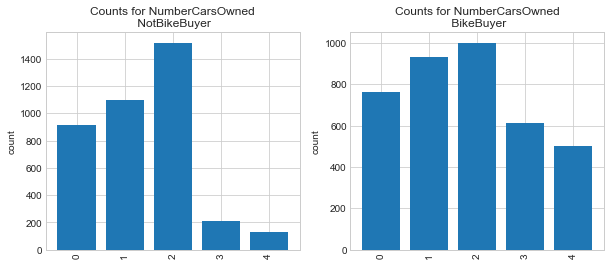

NumberChildrenAtHome


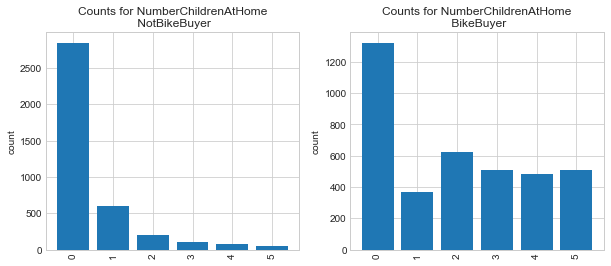

TotalChildren


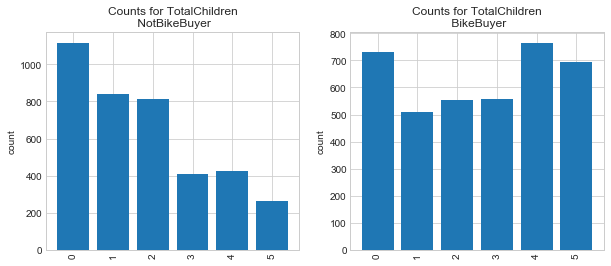

In [20]:
train['dummy'] = np.ones(shape = train.shape[0])
cat_col.remove('BikeBuyer')
cat_col.remove('StateProvinceName')
cat_col.remove('City')
for col in cat_col:
    print(col)
    counts = train[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n NotBikeBuyer')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n BikeBuyer')
    plt.ylabel('count')
    plt.show()
    
del train['dummy']

BirthYear


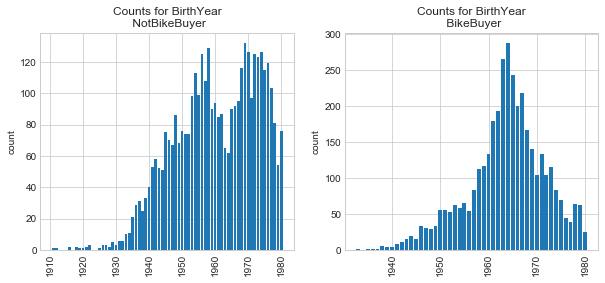

In [21]:
train['dummy'] = np.ones(shape = train.shape[0])

for col in ['BirthYear']:
    print(col)
    counts = train[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n NotBikeBuyer')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n BikeBuyer')
    plt.ylabel('count')
    plt.show()
    
del train['dummy']

# Modelling

In [22]:
from catboost import CatBoostClassifier,cv,Pool

In [23]:
X=train.drop(['BikeBuyer'],axis=1)
Y=train['BikeBuyer']

Y=Y.ravel()

In [24]:
split_test_size=0.2

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, test_size=split_test_size, random_state=450)

In [25]:
X.shape

(7685, 14)

In [28]:
X.columns

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BirthYear'],
      dtype='object')

In [29]:
cb_cat=CatBoostClassifier(iterations=1000,depth=5,eval_metric='Accuracy', cat_features=[0,1,2,3,4,5,6,7,8,9,10],
                    random_seed=10,learning_rate=.1,verbose=False)

cb_cat.fit(Xtrain,Ytrain,use_best_model=True,eval_set=(Xtest,Ytest),early_stopping_rounds=50,verbose=50)

0:	learn: 0.7587833	test: 0.7573195	best: 0.7573195 (0)	total: 338ms	remaining: 5m 37s
50:	learn: 0.7802537	test: 0.7807417	best: 0.7807417 (41)	total: 7.47s	remaining: 2m 19s
100:	learn: 0.7849707	test: 0.7794405	best: 0.7813923 (54)	total: 12s	remaining: 1m 46s
150:	learn: 0.7896877	test: 0.7859466	best: 0.7865973 (132)	total: 19.6s	remaining: 1m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7865972674
bestIteration = 132

Shrink model to first 133 iterations.


In [30]:
cb_best=CatBoostClassifier(iterations=133,depth=5,eval_metric='Accuracy', cat_features=[0,1,2,3,4,5,6,7,8,9,10],
                    random_seed=10,learning_rate=.1,verbose=False)

cb_best.fit(X,Y,verbose=1000)

0:	learn: 0.7541965	total: 503ms	remaining: 1m 6s
132:	learn: 0.7915420	total: 17.9s	remaining: 0us


Text(0.5,0,'Relative Importance in Percentage')

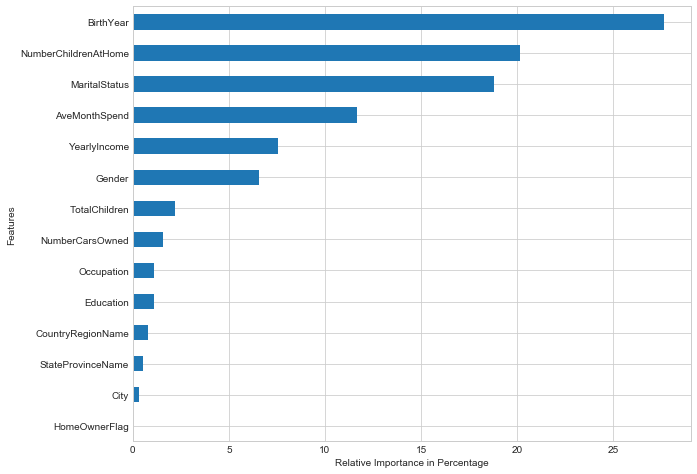

In [31]:
b=list(cb_best.feature_importances_[:])
pd.DataFrame(index=X.columns,data=b).sort_values(0).plot.barh(figsize=(10,8),legend=False)
plt.ylabel('Features')
plt.xlabel('Relative Importance in Percentage')

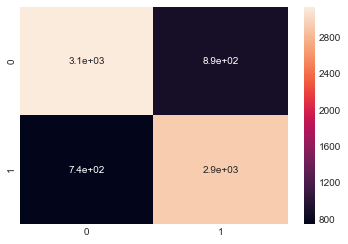

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(cb_best.predict(X),Y),annot=True)

In [33]:
print(classification_report(cb_best.predict(X),Y))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79      4015
         1.0       0.77      0.80      0.78      3670

   micro avg       0.79      0.79      0.79      7685
   macro avg       0.79      0.79      0.79      7685
weighted avg       0.79      0.79      0.79      7685



In [35]:
mask=(cb_best.feature_importances_[:]>1)
(cb_best.feature_importances_[mask]).sum()

98.36101204014514

In [36]:
c=Xtrain.columns[mask]

In [37]:
Xtrain_m=Xtrain[c]
Xtest_m=Xtest[c]

In [38]:
Xtrain_m.columns

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'AveMonthSpend', 'BirthYear'],
      dtype='object')

In [39]:
cb=CatBoostClassifier(iterations=1000,depth=5,eval_metric='Accuracy',cat_features=[0,1,2,3,4,5,6],
                    random_seed=10,learning_rate=.1,verbose=False)

cb.fit(Xtrain_m,Ytrain,use_best_model=True,eval_set=(Xtest_m,Ytest),early_stopping_rounds=50,verbose=50)

0:	learn: 0.7483735	test: 0.7488614	best: 0.7488614 (0)	total: 100ms	remaining: 1m 39s
50:	learn: 0.7716331	test: 0.7755368	best: 0.7794405 (35)	total: 4.47s	remaining: 1m 23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7794404684
bestIteration = 35

Shrink model to first 36 iterations.


In [40]:
cb_cat=CatBoostClassifier(iterations=1000,depth=5,eval_metric='Accuracy', cat_features=[0,1,2,3,4,5,6,7,8,9,10,12],
                    random_seed=10,learning_rate=.1,verbose=False)

cb_cat.fit(Xtrain,Ytrain,use_best_model=True,eval_set=(Xtest,Ytest),early_stopping_rounds=50,verbose=50)

0:	learn: 0.7275537	test: 0.7247885	best: 0.7247885 (0)	total: 157ms	remaining: 2m 37s
50:	learn: 0.7719584	test: 0.7722837	best: 0.7729343 (42)	total: 5.81s	remaining: 1m 48s
100:	learn: 0.7799284	test: 0.7800911	best: 0.7800911 (89)	total: 11.1s	remaining: 1m 38s
150:	learn: 0.7887118	test: 0.7820429	best: 0.7826936 (146)	total: 17.1s	remaining: 1m 35s
200:	learn: 0.7937541	test: 0.7891997	best: 0.7898504 (188)	total: 23s	remaining: 1m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7898503578
bestIteration = 188

Shrink model to first 189 iterations.


In [41]:
cb_cat=CatBoostClassifier(iterations=189,depth=5,eval_metric='Accuracy', cat_features=[0,1,2,3,4,5,6,7,8,9,10,12],
                    random_seed=10,learning_rate=.1,verbose=False)

cb_cat.fit(X,Y,verbose=50)

0:	learn: 0.7453481	total: 184ms	remaining: 34.7s
50:	learn: 0.7776187	total: 6.71s	remaining: 18.1s
100:	learn: 0.7847755	total: 12.6s	remaining: 11s
150:	learn: 0.7903709	total: 20.9s	remaining: 5.25s
188:	learn: 0.7931034	total: 26.6s	remaining: 0us


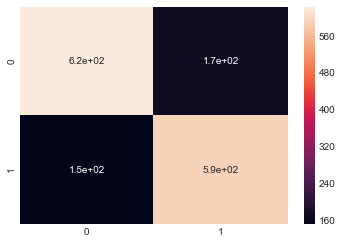

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(cb_cat.predict(Xtest),Ytest),annot=True)

In [43]:
print(classification_report(cb_cat.predict(X),Y))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79      3993
         1.0       0.77      0.80      0.78      3692

   micro avg       0.79      0.79      0.79      7685
   macro avg       0.79      0.79      0.79      7685
weighted avg       0.79      0.79      0.79      7685

